# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import datetime


# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df['date']= pd.to_datetime(pyber_data_df['date'])

                                                             
       
# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
#split columns
pyber_data_df["new_date"] = pyber_data_df["date"].dt.date
pyber_data_df["new_time"] = pyber_data_df["date"].dt.time

pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type,new_date,new_time
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban,2019-01-14,10:14:22
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban,2019-03-04,18:24:09
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban,2019-02-24,04:29:00
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban,2019-02-10,23:22:03
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban,2019-03-06,04:28:35


In [4]:
# Now split, convert date to yyyy-mm-dd format for later operations.
pyber_data_df['new_date'] = pd.to_datetime(pyber_data_df['new_date'], format='%Y-%m-%d')
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type,new_date,new_time
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban,2019-01-14,10:14:22
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban,2019-03-04,18:24:09
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban,2019-02-24,04:29:00
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban,2019-02-10,23:22:03
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban,2019-03-06,04:28:35


## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type
total_rides_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_type.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# 2. Get the total drivers for each city type
total_drivers_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_type.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type
total_fares_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_type.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
#  4. Get the average fare per ride for each city type. 
avg_fare_type = total_fares_type / total_rides_type
avg_fare_type.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver = total_fares_type / total_drivers_type
avg_fare_driver.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_data_df = pd.DataFrame({"Total Rides": total_rides_type, "Total Drivers": total_drivers_type, 
                                "Total Fare": total_fares_type, "Average Fare per Ride": avg_fare_type, 
                                "Average Fare per Driver": avg_fare_driver})

pyber_summary_data_df

,Total Rides,Total Drivers,Total Fare,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_data_df.index.name = None
pyber_summary_data_df

,Total Rides,Total Drivers,Total Fare,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
#  8. Format the columns.
pyber_summary_data_df["Total Rides"]=pyber_summary_data_df["Total Rides"].map("{:,}".format)
pyber_summary_data_df["Total Drivers"]=pyber_summary_data_df["Total Drivers"].map("{:,}".format)
pyber_summary_data_df["Total Fare"]=pyber_summary_data_df["Total Fare"].map("${:,.2f}".format)                 
pyber_summary_data_df["Average Fare per Ride"]=pyber_summary_data_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_data_df["Average Fare per Driver"]=pyber_summary_data_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_data_df  

,Total Rides,Total Drivers,Total Fare,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame
pyber_data_df

pyber_data_df

,city,date,fare,ride_id,driver_count,type,new_date,new_time
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban,2019-01-14,10:14:22
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban,2019-03-04,18:24:09
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban,2019-02-24,04:29:00
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban,2019-02-10,23:22:03
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban,2019-03-06,04:28:35
...,...,...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural,2019-04-29,17:04:39
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural,2019-01-30,00:05:47
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural,2019-02-10,21:03:50
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural,2019-05-07,19:22:15


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_date_df=pyber_data_df.groupby(["type", "new_date"]).sum()[["fare"]]
fares_by_date_df.head()

fare
type  new_date         
Rural 2019-01-01  43.69
      2019-01-02  52.12
      2019-01-03  19.90
      2019-01-04  24.88
      2019-01-06  47.33

In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_by_date_df = fares_by_date_df.reset_index()
fares_by_date_df.head()

,type,new_date,fare
0,Rural,2019-01-01,43.69
1,Rural,2019-01-02,52.12
2,Rural,2019-01-03,19.90
3,Rural,2019-01-04,24.88
4,Rural,2019-01-06,47.33


In [16]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_by_date_pivot = fares_by_date_df.pivot(index="new_date", columns="type", values="fare")
fares_by_date_pivot.head()

type,Rural,Suburban,Urban
new_date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89


In [17]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
limited_fare_dates_df = fares_by_date_pivot.loc["2019-01-01":"2019-04-28"]
limited_fare_dates_df.head()

type,Rural,Suburban,Urban
new_date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89


In [22]:
#6. Set the "date" index to datetime dattype.  This is necessary to use the resample() method in Step 8.
# df.index = pd.to_atetime(df.index)

limited_fare_dates_df.index = pd.to_datetime(limited_fare_dates_df.index)


In [23]:
# 7. Check that the datatype for the index is datetime using df.info()
limited_fare_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 2019-01-01 to 2019-04-28
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     73 non-null     float64
 1   Suburban  117 non-null    float64
 2   Urban     118 non-null    float64
dtypes: float64(3)
memory usage: 3.7 KB


In [24]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares = limited_fare_dates_df.resample("W").sum()
weekly_fares.head()

type,Rural,Suburban,Urban
new_date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


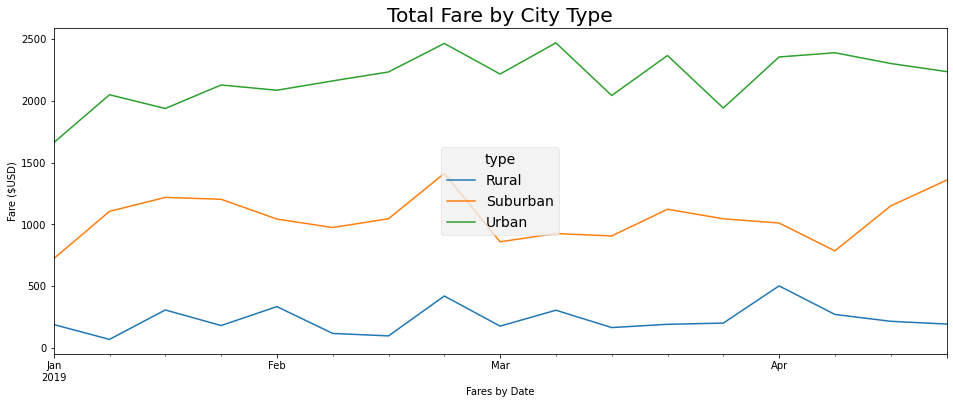

In [25]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
ax = weekly_fares.plot(figsize=(16, 6))
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax.legend(["Rural", "Suburban", "Urban"], loc="center", title="type")
ax.set_title("Total Fare by City Type")
ax.set_xlabel("Fares by Date")
ax.set_ylabel("Fare ($USD)")

plt.savefig("analysis/Challenge_Figure.png")
plt.show()